# 기계학습 (60점)
pd.set_option('display.max_columns', None)
가공식품의 영양성분표 데이터
dataurl = https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/mock/003_m1.csv
출처 : https://www.data.go.kr/data/15047698/fileData.do 후처리

식품명 : {카테고리}_제품명 순서로 작성된다. unique한 카테고리는 5개 (라면,시리얼,식빵,아이스밀크,잼)이다.
식품명은 군집분석 모델링을 할 때 사용하지 않는다.
업체명 : 업체명
그 외 : 해당 컬럼명의 정량적인 값

## 기계학습1. 시각화 및 EDA

In [1]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore') 

path = 'C:/Windows/Fonts/malgun.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)
pd.set_option('display.max_columns', None)

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/mock/003_m1.csv')
df.head(2)

,식품명,에너지(kcal),영양성분함량기준량,수분(g),단백질(g),지방(g),회분(g),탄수화물(g),당류(g),식이섬유(g),칼슘(mg),철(mg),인(mg),칼륨(mg),나트륨(mg),비타민 A(μg RAE),레티놀(μg),베타카로틴(μg),티아민(mg),리보플라빈(mg),니아신(mg),비타민 C(mg),비타민 D(μg),콜레스테롤(mg),포화지방산(g),트랜스지방산(g),업체명
0,라면_스낵면Cup,427,100g,0.0,8.06,14.52,0.0,66.13,4.84,0.0,0.0,0.0,0.0,0.0,1935.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.48,0.0,"오뚜기라면(주),해당없음,해당없음"
1,라면_준코라면,417,100g,0.0,8.33,12.50,0.0,67.50,4.17,0.0,0.0,0.0,0.0,0.0,1525.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.67,0.0,"(주)팔도,해당없음,해당없음"


In [3]:
def resume(df):
    print(df.shape)
    print(len(df.select_dtypes('number').columns),df.select_dtypes('number').columns)
    print(df.columns.difference(df.select_dtypes('number').columns))
    tmp = pd.DataFrame()
    tmp['데이터타입'] = df.dtypes
    tmp['결측치'] = df.isna().sum()   
    tmp['유일값'] = df.nunique()
    tmp['첫번째'] = df.iloc[0,:]       
    tmp['두번째'] = df.iloc[1,:]                  
    return tmp
resume(df)

(1850, 27)
24 Index(['에너지(kcal)', '수분(g)', '단백질(g)', '지방(g)', '회분(g)', '탄수화물(g)', '당류(g)',
       '식이섬유(g)', '칼슘(mg)', '철(mg)', '인(mg)', '칼륨(mg)', '나트륨(mg)',
       '비타민 A(μg RAE)', '레티놀(μg)', '베타카로틴(μg)', '티아민(mg)', '리보플라빈(mg)',
       '니아신(mg)', '비타민 C(mg)', '비타민 D(μg)', '콜레스테롤(mg)', '포화지방산(g)',
       '트랜스지방산(g)'],
      dtype='object')
Index(['식품명', '업체명', '영양성분함량기준량'], dtype='object')


,데이터타입,결측치,유일값,첫번째,두번째
식품명,object,0,1716,라면_스낵면Cup,라면_준코라면
에너지(kcal),int64,0,359,427,417
영양성분함량기준량,object,0,2,100g,100g
수분(g),float64,0,12,0.0,0.0
단백질(g),float64,0,368,8.06,8.33
지방(g),float64,0,460,14.52,12.5
회분(g),float64,0,12,0.0,0.0
탄수화물(g),float64,0,593,66.13,67.5
당류(g),float64,0,550,4.84,4.17
식이섬유(g),float64,0,28,0.0,0.0


- 27 개의 특성, 1850개의 레이블을 가진 데이터
- '식품명', '업체명', '영양성분함량기준량'을 범주형
- 수분(g)~트랜스지방산(g)까지 24개 성분에 대한 함유량 데이터
- 영양성분함량기준량을 종속변수로 범주를 예측하는 다변수분류모델 가능
- 영양성분기준으로 에너지나 수분 추론하는 회기모델 가능
- 클러스터링을 통해 식품 별 카테고리를 군집화 가능
- 결측치는 없으나, 일부 영양소의 경우 함유량이 매우 낮으며 유일값의 수 적은 것 확인

In [4]:
print('== 수치형변수 기초통계 ==')
display(df.describe())
# display(df.describe(exclude = 'object'))

== 수치형변수 기초통계 ==


,에너지(kcal),수분(g),단백질(g),지방(g),회분(g),탄수화물(g),당류(g),식이섬유(g),칼슘(mg),철(mg),인(mg),칼륨(mg),나트륨(mg),비타민 A(μg RAE),레티놀(μg),베타카로틴(μg),티아민(mg),리보플라빈(mg),니아신(mg),비타민 C(mg),비타민 D(μg),콜레스테롤(mg),포화지방산(g),트랜스지방산(g)
count,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000
mean,267.815676,0.161784,4.361259,5.823308,0.004989,49.469870,24.422249,0.116703,2.507027,0.038097,0.291351,0.625946,364.671351,5.034054,2.598919,0.442703,0.010362,0.012358,0.092648,0.756146,0.030686,5.936859,2.812351,0.038422
std,107.663634,2.492189,3.935444,5.839878,0.082743,20.140631,20.576465,0.936131,22.517470,0.480589,5.898271,10.042020,571.582104,79.112652,69.901648,9.527462,0.159760,0.175731,1.232844,9.898397,0.449132,11.893506,2.944013,0.162770
min,35.000000,0.000000,0.000000,0.000000,0.000000,6.710000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,181.000000,0.000000,1.000000,0.200000,0.000000,28.690000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,251.000000,0.000000,2.860000,4.430000,0.000000,52.000000,17.140000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.085000,0.000000
75%,364.500000,0.000000,8.000000,8.982500,0.000000,65.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,410.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.775000,4.700000,0.000000
max,515.000000,62.000000,23.330000,39.000000,1.900000,98.000000,90.000000,15.000000,350.000000,11.950000,217.000000,320.000000,2263.000000,2431.000000,2423.000000,340.000000,5.069000,5.185000,26.145000,222.840000,8.330000,268.520000,19.000000,3.900000


- 레티놀, 베타카로민 등 평균이 중앙값보다 큰 성향을 보이며, 왜도가 큰 성향을 보임.
- 탄수화물 지방, 단백질 등 영양소는 대체로 고르게 분포

In [5]:
print('== 명목형변수 기초통계 ==')
display(df.describe(include = 'object'))

== 명목형변수 기초통계 ==


,식품명,영양성분함량기준량,업체명
count,1850,1850,1850
unique,1716,2,411
top,잼_딸기잼,100g,"오뚜기라면(주),해당없음,해당없음"
freq,11,1375,61


== 수치형 변수 히스토그램 ==



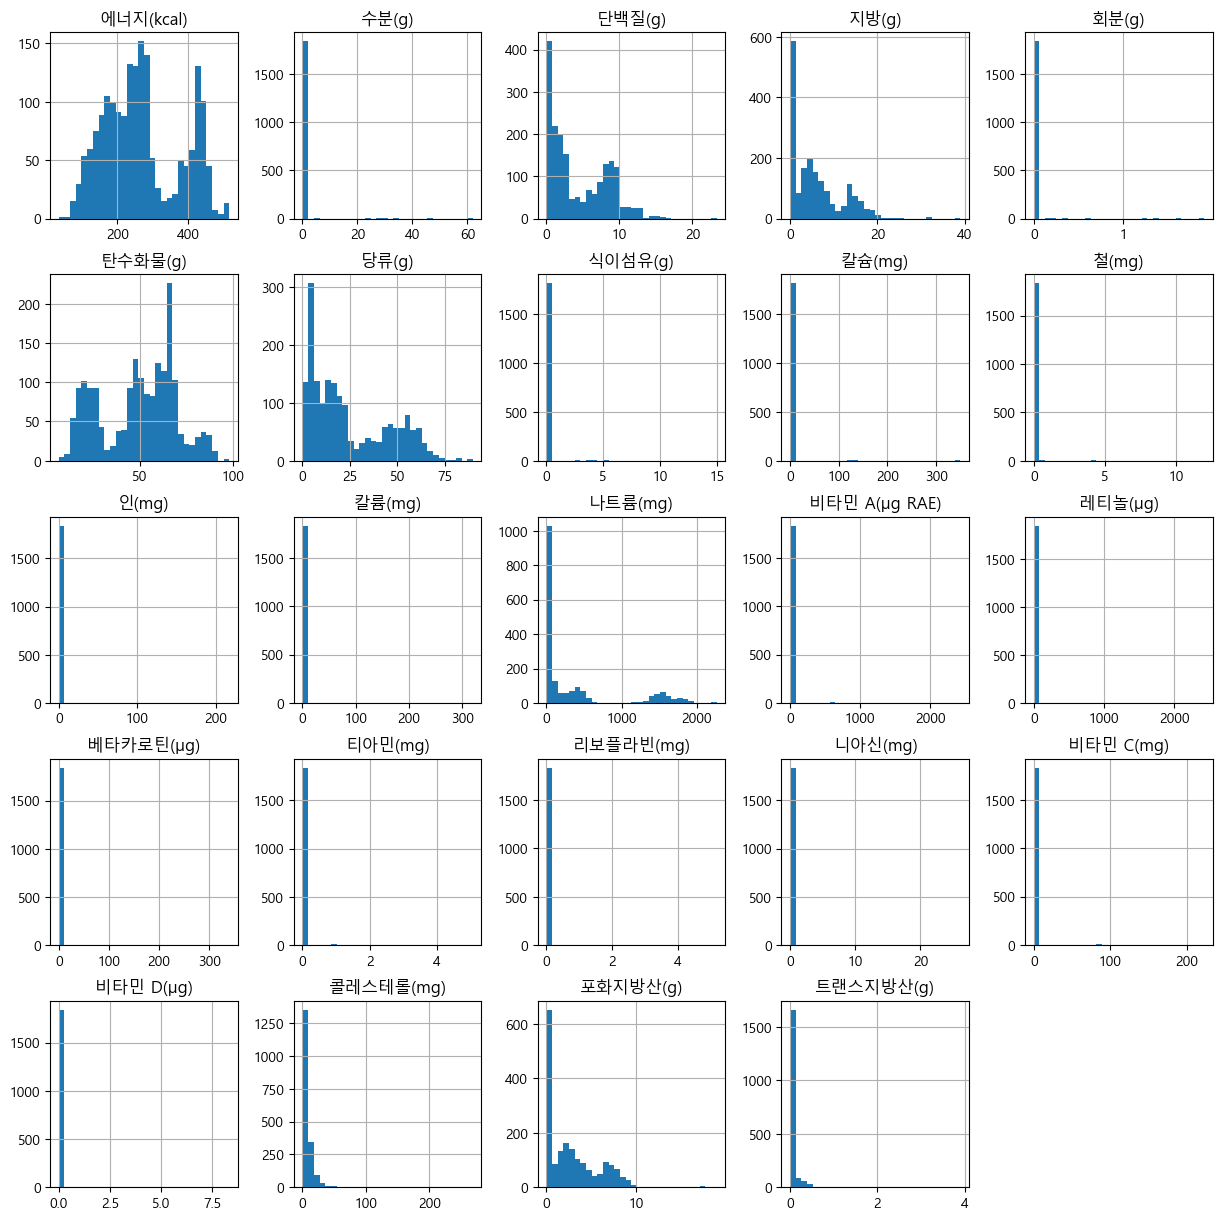


 ==> 영양변수의 상당수가 값이 0이면서 매우 큰 값이 일부 있는 것으로 확인된다.


In [6]:
# 수치형 변수 히스토그램

print('== 수치형 변수 히스토그램 ==\n')

df.hist(bins = 30, figsize = (15, 15))
# df.hist(bins = 30)
plt.show()

print('\n ==> 영양변수의 상당수가 값이 0이면서 매우 큰 값이 일부 있는 것으로 확인된다.')


 ==> 영양변수에 이상치가 보이나 대부분의 데이터가 0에 집중되어있다. 이상치가 향후 군집화에 긍정적인 영향을 줄 수 있으므로 별도로 처리하지 않기로 한다.


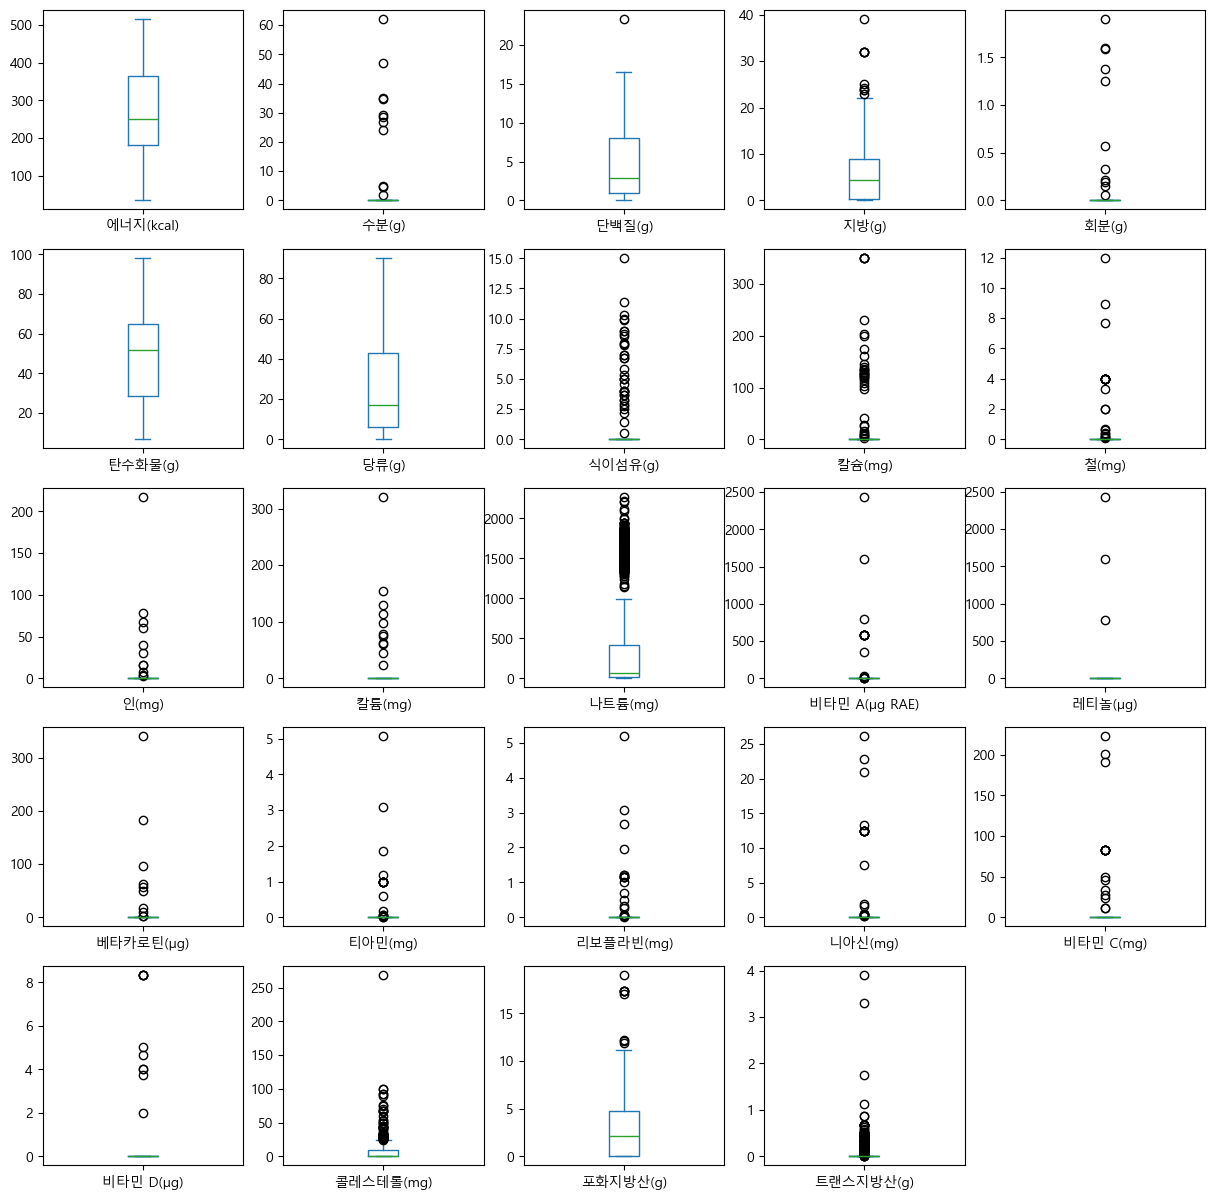

In [7]:
df.select_dtypes('number').plot(kind='box',subplots=True, layout=(5,5), figsize = (15,15));
print('\n ==> 영양변수에 이상치가 보이나 대부분의 데이터가 0에 집중되어있다. 이상치가 향후 군집화에 긍정적인 영향을 줄 수 있으므로 별도로 처리하지 않기로 한다.')

- 단백질, 지방, 탄수화물, 당류, 나트륨, 포화지방산 외의 경우에는 일부 제품에만 분포

## 기계학습 2.
식품명을 모르는 상태에서 영양성분표를 바탕으로 데이터를 군집화 작업을 하려한다.
군집 모델링 전 차원 축소가 필요한지 확인하고 필요하다면 그 근거를 작성하고 차원축소를 진행하라.

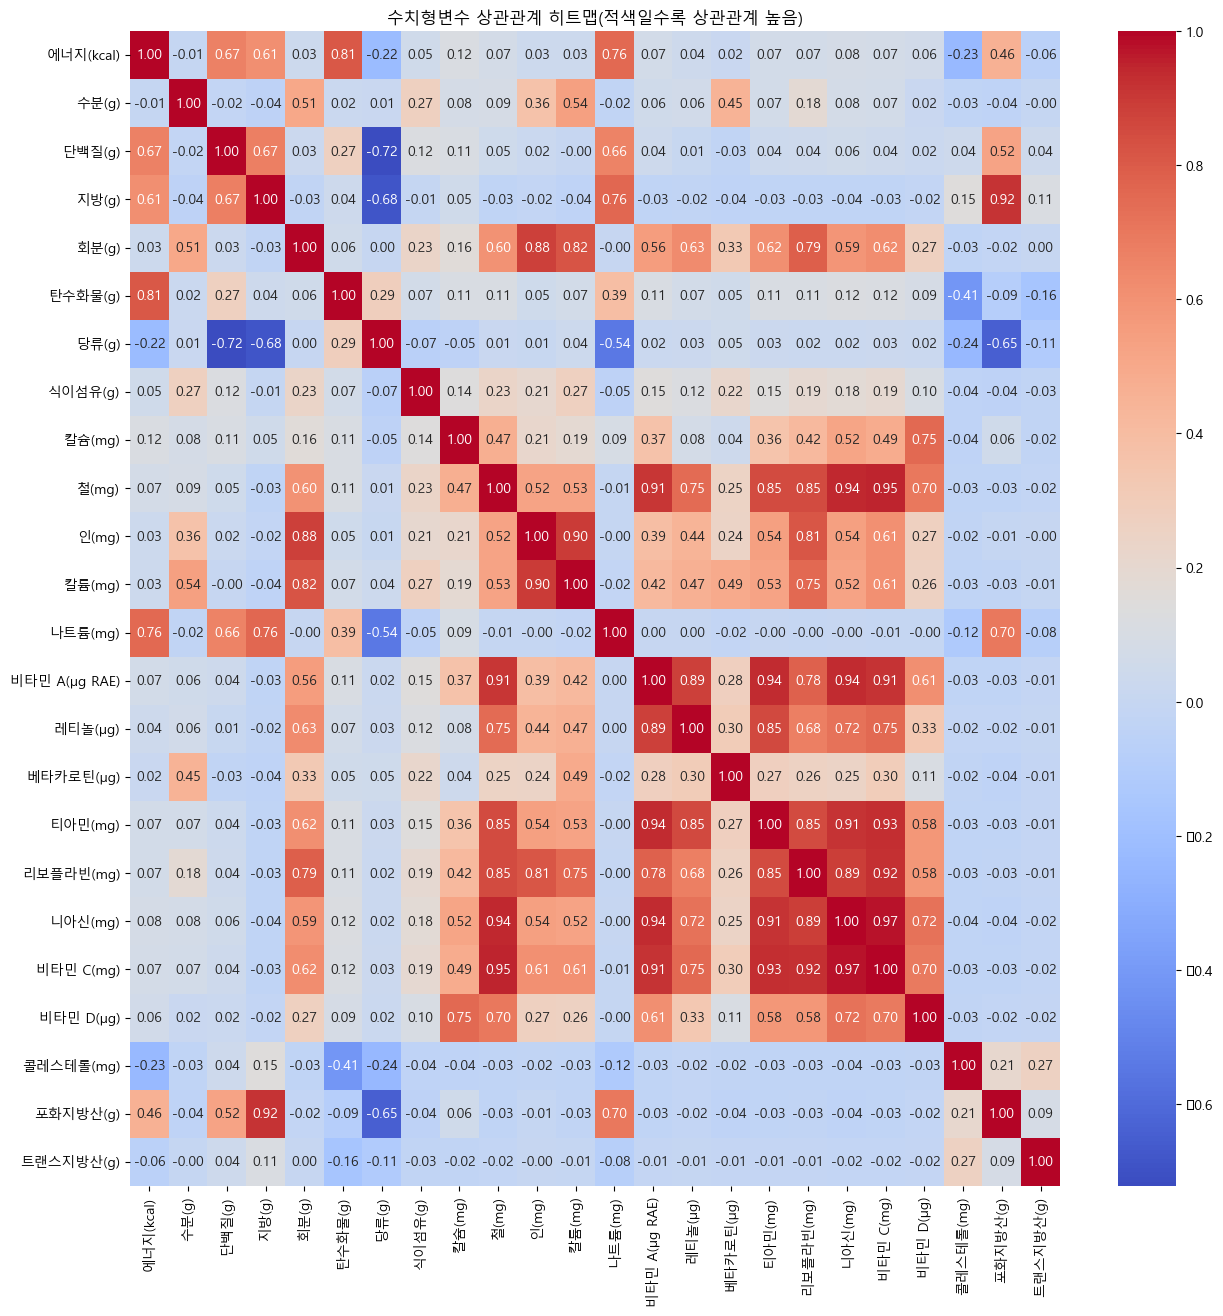

In [8]:
import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(df.corr(method = 'pearson', numeric_only = True),annot=True,fmt='.2f', cmap = 'coolwarm')
plt.title('수치형변수 상관관계 히트맵(적색일수록 상관관계 높음)')
plt.show()

- 0인 값이 많은 상태로서 (데이터가 매우 희소), 상관계수도 0.9 이상인 변수가 많음
- 차원축소를 통해, 성능을 개선할 필요가 있어보인다.
- 단, 군집화 라벨링에 따라 클러스터 별 영양소를 확인하며 특성을 파악할 필요가 있다

In [9]:
from sklearn.preprocessing import MinMaxScaler
# 희소한 특성만 차원축소 진행
X = df.select_dtypes('number')
Mmscaler = MinMaxScaler()
X_s = Mmscaler.fit_transform(X)

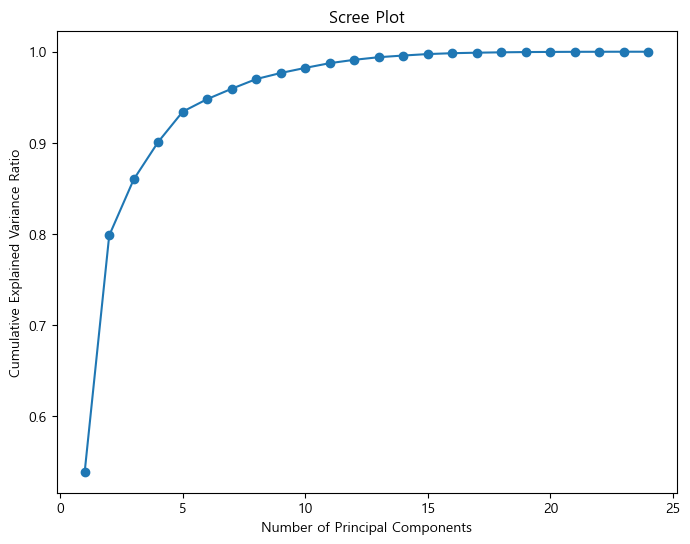

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

# PCA 객체 생성
pca = PCA()

# PCA 적용 및 설명된 분산 비율 계산
pca.fit(X_s)
exp_var_ratios = pca.explained_variance_ratio_

# 설명된 분산 비율 누적합 계산
cum_exp_var_ratios = exp_var_ratios.cumsum()

# 설명된 분산 비율 시각화
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(exp_var_ratios)+1), cum_exp_var_ratios, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

3개 차원으로 축소

In [11]:
pca = PCA(n_components=3)  
X_pca = pca.fit_transform(X_s)
X_pca = pd.DataFrame(X_pca,columns=[f'component{c}' for c in range(1,4)])


## 기계학습 3. 
위에서 전처리한 데이터를 기준으로 Kmeans 군집을 실시하라. 최적의 군집 수를 도출한 근거를 설명하라.
해당 군집 결과를 PCA를 진행한 두개의 축위에 각 클러스터별 다른 색상으로 산점도를 그려라.

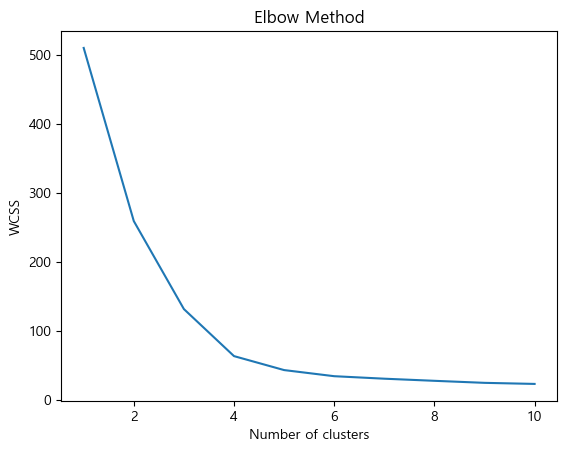

In [12]:
# Elbow 방법을 통한 K 값 결정
'''K-Means 알고리즘의 WCSS(Within-Cluster Sum of Squares) 값을 계산하고, 그래프에 플롯팅
그래프에서 급격한 꺾임이 발생하는 지점(팔꿈치 모양)이 최적의 K'''

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

5개의 군집에서 원활하게 군집을 형성하는 것을 확인하였음

In [13]:
import pandas as pd
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# 1. K-Means 알고리즘
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X_pca)
df['kmeans_cluster'] = kmeans.labels_

df['kmeans_cluster'].value_counts() 

kmeans_cluster
1    575
3    523
2    316
0    288
4    148
Name: count, dtype: int64

## 기계학습4
3,4에서 도출한 5개의 군집 결과 그래프와 실제 식품명의 카테고리를 비교 분석하여 이전 군집 분석에 대한 결과를 정리하라4. 계층적군집분석 실시하라, 군집간 거리 4가지 방법(최소,최대, 평균간거리, 평균으로) 다르게 군집분석 실시하고, PCA 축상에 군집별 산점도를 출력

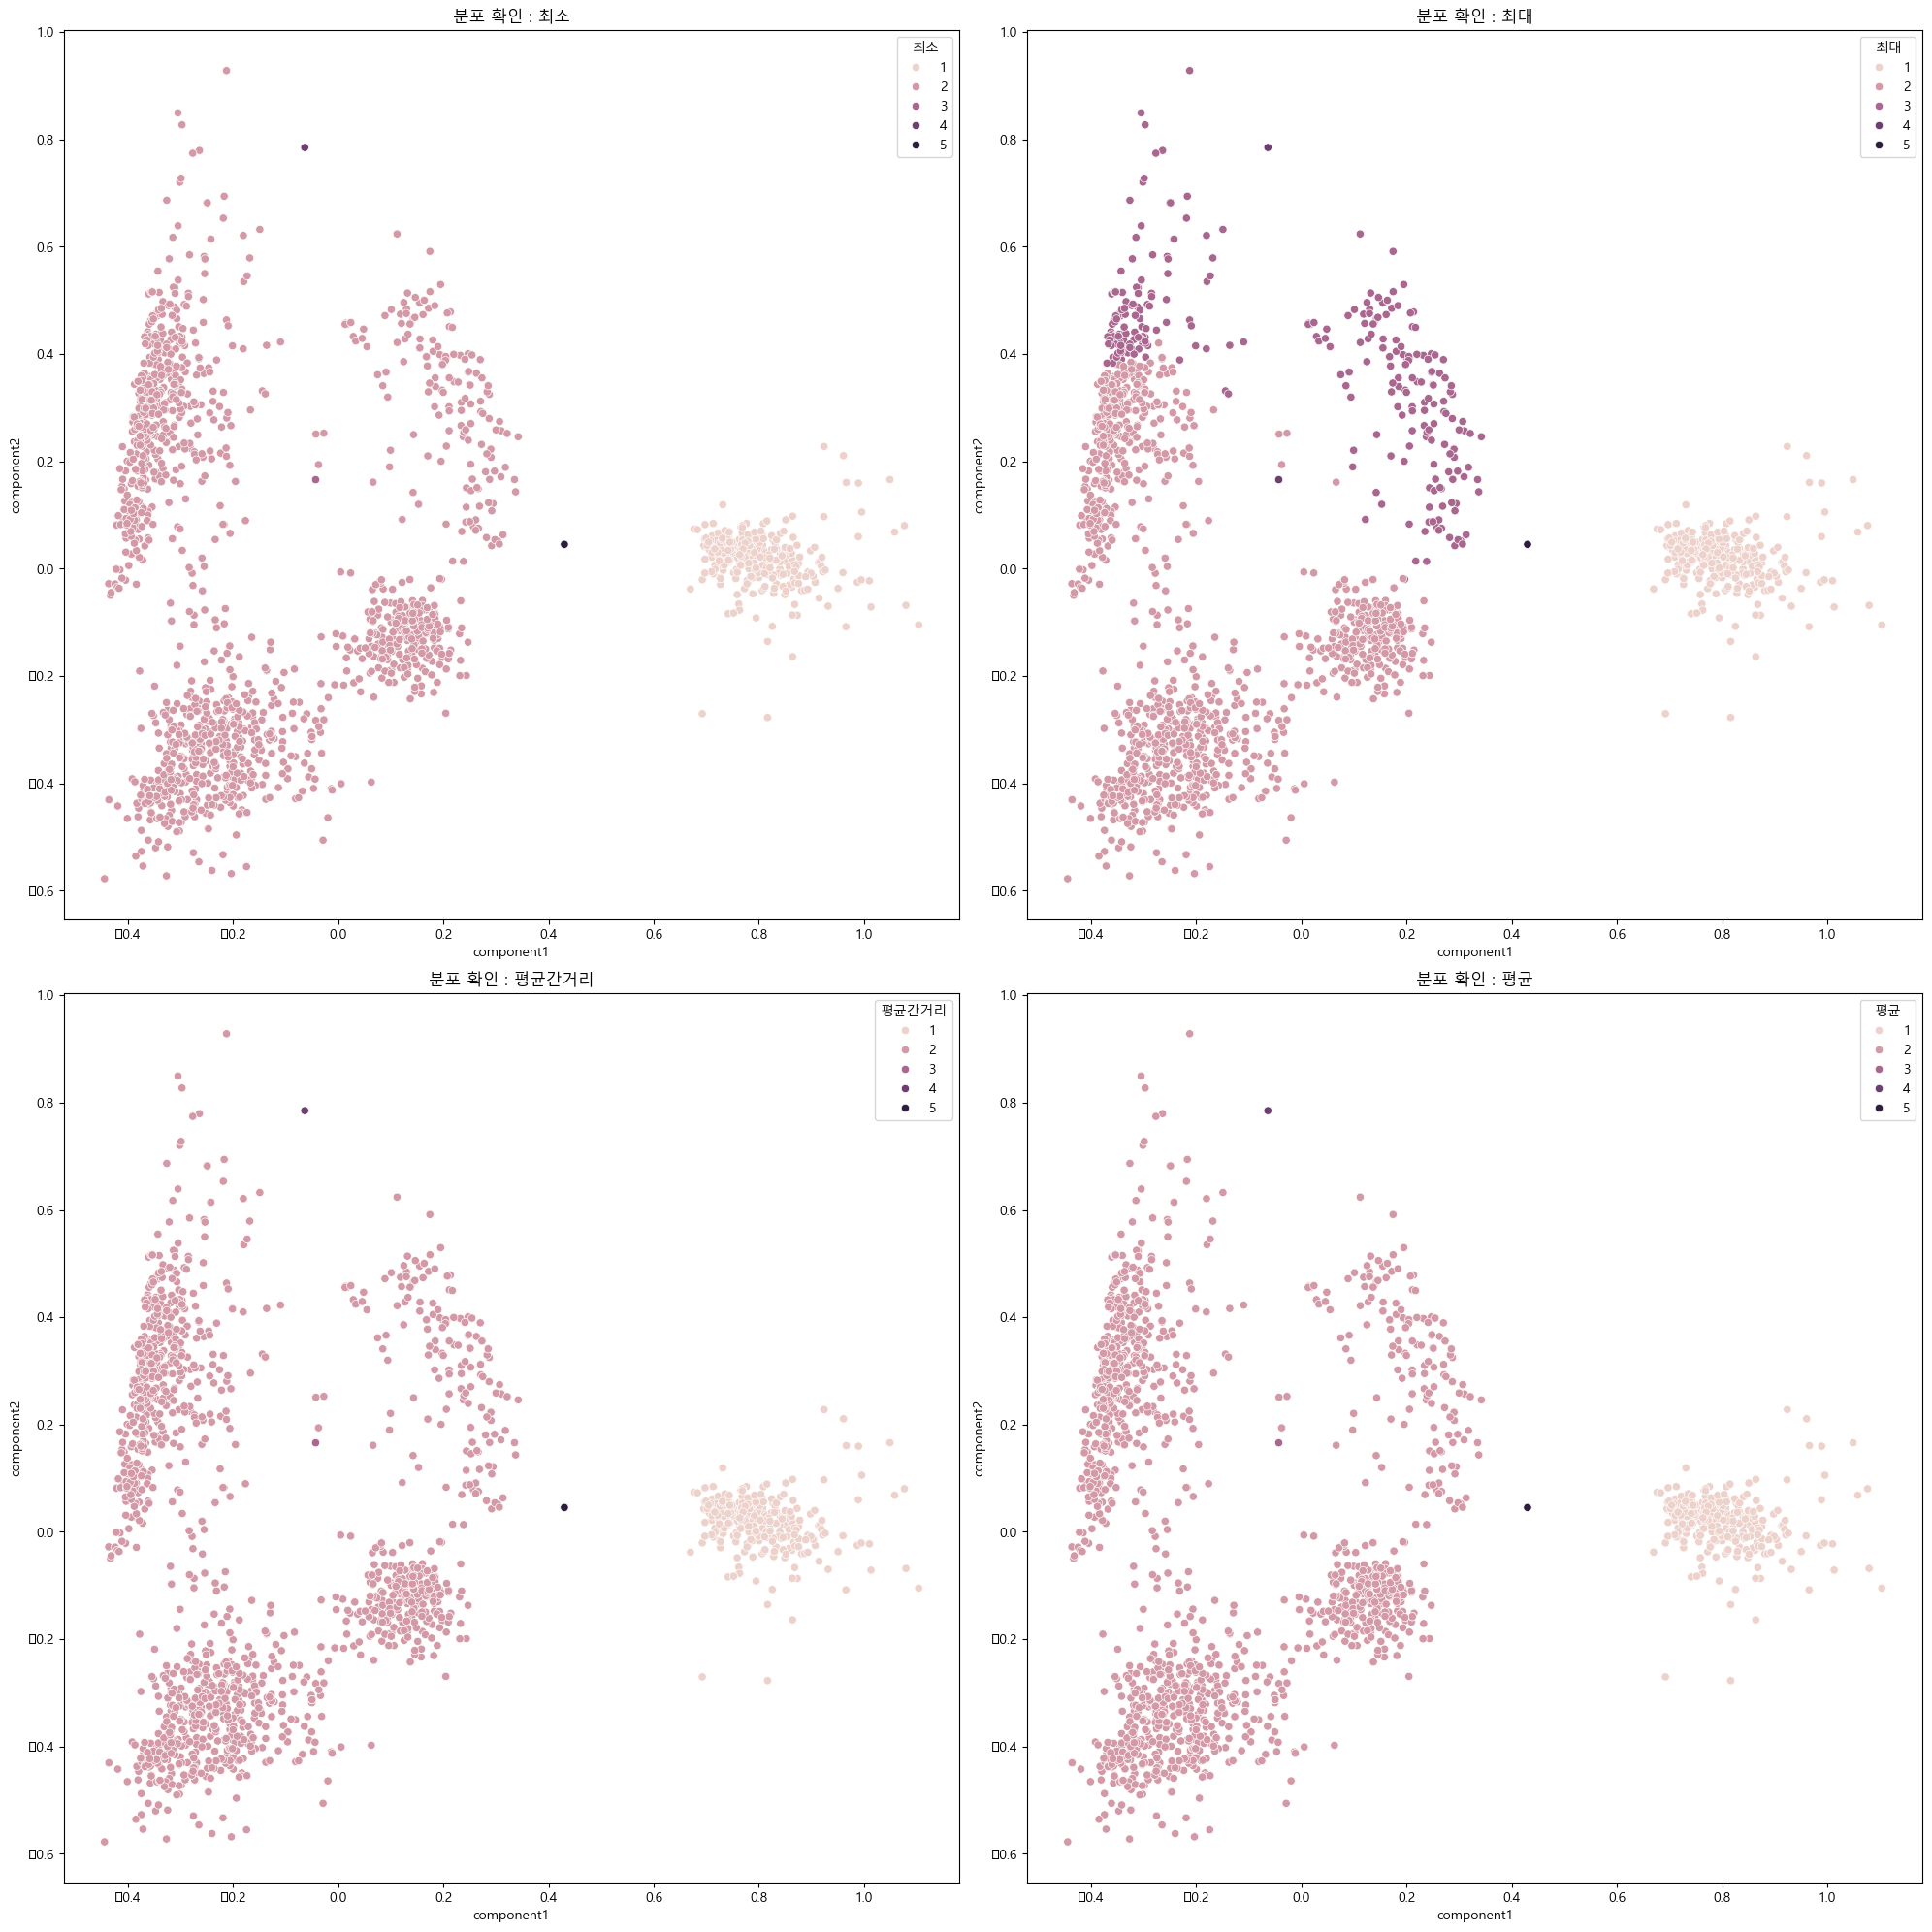

In [14]:
# 2. 계층적 군집분석
links = ['single','complete','centroid','weighted']
links_name = ['최소','최대','평균간거리','평균']
for i, link in enumerate(links):
    Z = linkage(X_pca, method=link)
    cluster_labels = fcluster(Z, t=5, criterion='maxclust')
    X_pca[links_name[i]] = cluster_labels

import matplotlib.pyplot as plt
import seaborn as sns
# 결과 출력
fig = plt.figure(figsize=(20, 20))
for i, label in enumerate(links_name):
    plt.subplot(2, 2, i+1)
    ax = sns.scatterplot(data=X_pca, x='component1', y='component2', hue=label)
    ax.set_title(f'분포 확인 : {label}')
plt.tight_layout(pad=1.0)

## 기계학습5
3,4에서 도출한 5개의 군집 결과 그래프와 실제 식품명의 카테고리를 비교 분석하여 이전 군집 분석에 대한 결과를 정리하라

In [15]:
df['카테고리'] = df['식품명'].apply(lambda x : x.split('_')[0])
df['카테고리'].value_counts()

카테고리
잼        576
아이스밀크    524
라면       311
식빵       279
시리얼      160
Name: count, dtype: int64

In [16]:
df['kmeans_cluster'].value_counts()

kmeans_cluster
1    575
3    523
2    316
0    288
4    148
Name: count, dtype: int64

In [17]:
lab = {'잼':1,
'아이스밀크':3,
'라면':2,
'식빵':0,
'시리얼':4}

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
y_true = df['카테고리'].map(lab)
y_pred = df['kmeans_cluster']
print(classification_report(y_true,y_pred))


              precision    recall  f1-score   support

           0       0.94      0.97      0.95       279
           1       1.00      1.00      1.00       576
           2       0.98      1.00      0.99       311
           3       0.99      0.99      0.99       524
           4       0.97      0.90      0.94       160

    accuracy                           0.98      1850
   macro avg       0.98      0.97      0.97      1850
weighted avg       0.98      0.98      0.98      1850



In [19]:
confusion_matrix(y_true,y_pred)

array([[270,   0,   4,   3,   2],
       [  0, 574,   0,   0,   2],
       [  0,   0, 310,   1,   0],
       [  4,   1,   0, 519,   0],
       [ 14,   0,   2,   0, 144]], dtype=int64)

- 잼, 라면, 식빵, 잼 은 명확하게 구분하며 비교적 잘맞추는 것 확인하였으나, 시리얼은 일부 잼과 혼동
- 영양성분으로도, 식품의 종류가 어느정도 구분 가능하였음

## 기계학습6
모델링을 위한 데이터 전처리를 시행하라. 추가로 건물용도 마다 각각 여러 수치형변수(임대평수, 건물 건축 기간(2024년기준), 소모비용)간의 통계적 차이가 있는지 확인하라

In [20]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/mock/003_m2.csv')
resume(df)

(25530, 12)
6 Index(['층', '계약일', '보증금(만원)', '임대료(만원)', '건축년도', '임대평수'], dtype='object')
Index(['건물용도', '계약기간', '법정동명', '자치구명', '전월세구분', '지번'], dtype='object')


,데이터타입,결측치,유일값,첫번째,두번째
자치구명,object,0,1,강서구,강서구
법정동명,object,0,9,화곡동,화곡동
지번,object,0,4118,343-66,343-66
층,int64,0,25,2,2
계약일,int64,0,415,20230102,20230211
전월세구분,object,0,2,월세,월세
보증금(만원),int64,0,1294,1000,1000
임대료(만원),int64,0,184,60,60
건축년도,float64,0,49,2004.0,2004.0
건물용도,object,0,3,오피스텔,오피스텔


- 강서구의 전월세 계약관련 데이터로 총 12개의 특성, 25530개의 샘플
- 총 소모비용 (보증금 + 임대료 * 계약기간(월))을 예측하는 모델을 만들려고 한다. 계약층, 지번, 건물용도, 임대평수, 보증금, 전월세구분 등이 설명변수
- 계약일은 정수형이나, 날짜형으로 변경 시 시계열 모델로 예측 가능
- 계약기간은 범주형처럼보이나, 피쳐엔지니어링으로 총 계약기간, 계약종료월의 파생변수를 생성 가능
- 자치구명은 유일값이므로 드롭해도 상관없다.
- 계약일 - 건축년도를 사용하여 계약당시의 사용년수를 파생변수 생성가능

In [21]:
def spl1(x):
    li = x.split('~')
    cat = []
    for c in li:
        year = '20'+c.split('.')[0]
        month = str(c.split('.')[1])
        dt = pd.to_datetime(f'{year}-{month}')
        cat.append(dt)
    return cat[0]
def spl2(x):
    li = x.split('~')
    cat = []
    for c in li:
        year = '20'+c.split('.')[0]
        month = str(c.split('.')[1])
        dt = pd.to_datetime(f'{year}-{month}')
        cat.append(dt)
    return cat[1]

In [22]:
# 계약일의 날짜화
df['계약일'] = df['계약일'].apply(lambda x : str(x)[:4]+'-'+str(x)[4:6]+'-'+str(x)[6:])
df['계약일'] = pd.to_datetime(df['계약일'])
# 계약기간으로부터 시작일, 종료일, 기간 추출
df['계약시작'] = df['계약기간'].apply(spl1)
df['계약종료'] = df['계약기간'].apply(spl2)
df['계약기간'] = df['계약종료'] - df['계약시작']     
df['계약기간'] = df['계약기간'].dt.days//30

In [23]:
df['사용년수'] = df['계약시작'].dt.year-df['건축년도']

In [24]:
df['총소모비용'] = df['보증금(만원)'] + df['임대료(만원)']*df['계약기간']

In [25]:
from scipy.stats import kstest

print('''=== 건물용도별 임대평수, 건물 건축 기간(2024년기준), 소모비용 평균의 차이 검정 ===
''')
print('''정규성 만족여부 검정

데이터 수가 5000을 초과하므로 비모수 검정법인 콜모고로프 스미르노프(KS) 검정법을 적용한다.

귀무가설 : 데이터가 정규성을 만족한다.
대립가설 : 데이터가 정규성을 만족하지 않는다.''')

for 용도 in df.건물용도.unique():
    for col in ['임대평수','사용년수','총소모비용']:
        target = df[df.건물용도 == 용도][col]
        print(f'''
        == {용도}의 {col} 정규성 검정 ==''')
        print(kstest(target, 'norm', args = (target.mean(), target.std()), alternative = 'two-sided'))
        
print('''
==> p-value < 0.05로 귀무가설을 기각한다. 정규성을 만족하지 않는 것으로 판단되므로 크루스칼 왈리스 검정을 진행한다.''')

=== 건물용도별 임대평수, 건물 건축 기간(2024년기준), 소모비용 평균의 차이 검정 ===

정규성 만족여부 검정

데이터 수가 5000을 초과하므로 비모수 검정법인 콜모고로프 스미르노프(KS) 검정법을 적용한다.

귀무가설 : 데이터가 정규성을 만족한다.
대립가설 : 데이터가 정규성을 만족하지 않는다.

        == 오피스텔의 임대평수 정규성 검정 ==
KstestResult(statistic=0.17644974196712926, pvalue=9.081956127437736e-229, statistic_location=9.1, statistic_sign=1)

        == 오피스텔의 사용년수 정규성 검정 ==
KstestResult(statistic=0.2816875264330142, pvalue=0.0, statistic_location=8.0, statistic_sign=1)

        == 오피스텔의 총소모비용 정규성 검정 ==
KstestResult(statistic=0.1999994813643809, pvalue=2.2429339921917267e-294, statistic_location=4200, statistic_sign=1)

        == 연립다세대의 임대평수 정규성 검정 ==
KstestResult(statistic=0.1611346383157901, pvalue=7.634592451324716e-162, statistic_location=9.1, statistic_sign=1)

        == 연립다세대의 사용년수 정규성 검정 ==
KstestResult(statistic=0.14141708059368308, pvalue=1.3590474728372842e-124, statistic_location=8.0, statistic_sign=1)

        == 연립다세대의 총소모비용 정규성 검정 ==
KstestResult(statistic=0.08496380712757862, pvalue=3.9778

In [26]:
from scipy.stats import kruskal

# for 용도 in df2.건물용도.unique():
#     for col in ['임대평수','건축경과연도','총소모비용']:

print('''귀무가설 : 건물용도별 평균에 차이가 없다.
대립가설 : 건물용도별 평균에 차이가 있다.''')

for col in ['임대평수','사용년수','총소모비용']:
    오피스텔 = df[df.건물용도 == '오피스텔'][col]
    연립다세대 = df[df.건물용도 == '연립다세대'][col]
    아파트 = df[df.건물용도 == '아파트'][col]
    print(f'''
    === 건물용도별 {col} 평균 차이 검정 ===''')
    print(kruskal(오피스텔, 연립다세대, 아파트))
    
print('''
==> 크루스칼 검정 결과 p-value < 0.05로 귀무가설을 기각한다.
즉, 건물용도별 각 변수의 평균에는 차이가 있는 것으로 분석된다.''')

귀무가설 : 건물용도별 평균에 차이가 없다.
대립가설 : 건물용도별 평균에 차이가 있다.

    === 건물용도별 임대평수 평균 차이 검정 ===
KruskalResult(statistic=11059.872337107361, pvalue=0.0)

    === 건물용도별 사용년수 평균 차이 검정 ===
KruskalResult(statistic=4974.345648255751, pvalue=0.0)

    === 건물용도별 총소모비용 평균 차이 검정 ===
KruskalResult(statistic=7959.2771594553205, pvalue=0.0)

==> 크루스칼 검정 결과 p-value < 0.05로 귀무가설을 기각한다.
즉, 건물용도별 각 변수의 평균에는 차이가 있는 것으로 분석된다.


In [27]:
df.columns

Index(['자치구명', '법정동명', '지번', '층', '계약일', '전월세구분', '보증금(만원)', '임대료(만원)', '건축년도',
       '건물용도', '계약기간', '임대평수', '계약시작', '계약종료', '사용년수', '총소모비용'],
      dtype='object')

In [28]:
X= pd.get_dummies(df[['법정동명', '층', '전월세구분', '건물용도', '계약기간', '임대평수', '사용년수' ]],dtype=int)
y = df['총소모비용']

## 기계학습7
xgb,lightgbm,randomforest 각 모델을 학습하고 각 모델별로 주요 변수들을 확인하고 해석하라

In [29]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor

In [30]:
from sklearn.metrics import r2_score
from time import time
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)
xgb, lgb, rf = XGBRegressor(),LGBMRegressor(),RandomForestRegressor()
models = [xgb, lgb, rf]
model_names = ['XGBRegressor', 'LGBMRegressor', 'RandomForestRegressor']
for i,model in enumerate(models) : 
    s= time()
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    score = r2_score(y_test,pred)
    e= time()
    takes = e-s
    res = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['특성중요도']).sort_values('특성중요도',ascending=False)
    print(f'===========모델명 {model_names[i]}=============')
    print(f'시간 : {takes:.3f}')
    print(f'r2_score:{score:.3f}')
    display(res.round(3))
    print()

===========모델명 XGBRegressor=============
시간 : 0.123
r2_score:0.906


,특성중요도
전월세구분_월세,0.348
임대평수,0.195
건물용도_아파트,0.187
건물용도_연립다세대,0.137
법정동명_방화동,0.024
사용년수,0.023
계약기간,0.012
법정동명_화곡동,0.012
법정동명_등촌동,0.011
건물용도_오피스텔,0.010



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 364
[LightGBM] [Info] Number of data points in the train set: 20424, number of used features: 18
[LightGBM] [Info] Start training from score 19947.325353
===========모델명 LGBMRegressor=============
시간 : 0.181
r2_score:0.907


,특성중요도
임대평수,897
사용년수,796
층,385
전월세구분_월세,187
계약기간,150
법정동명_화곡동,87
건물용도_아파트,79
법정동명_방화동,76
법정동명_등촌동,57
법정동명_염창동,57



===========모델명 RandomForestRegressor=============
시간 : 3.774
r2_score:0.895


,특성중요도
임대평수,0.582
전월세구분_월세,0.120
전월세구분_전세,0.118
사용년수,0.070
층,0.030
건물용도_연립다세대,0.023
건물용도_아파트,0.021
계약기간,0.014
법정동명_화곡동,0.005
법정동명_방화동,0.004


# 통계 (40점)

## 통계1
학교내 학생들의 시험 점수를 나타낸 것이다. 성별과 학년이 점수에 대해 가지는 주효과 교호작용효과를 알아보고자 한다.
- (1) 주효과와 교호작용 효과에 대한 가설 설정
- (2) 통계검정을 사용하기 위한 사전 조건 확인
- (3) 통계검정 
- (4) 사후분석

범주형 변수에 따른 연속형 종속변수에 대한 추정이므로 Anova 분석이며, 교호작용을 확인하기 위해 ANOVA2를 진행한다.

In [67]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/mock/003_s4.csv')
df.head()

,성별,학년,점수
0,남학생,1학년,70
1,남학생,1학년,76
2,남학생,1학년,78
3,남학생,1학년,67
4,남학생,1학년,71


- 성별과 학년이라는 두개의 범주형 변수가 점수에 미치는 영향을 알아보기 위한 검정이므로 이원배치분산분석을 검토한다.

- 분산분석이란 두 개 이상의 집단에서 그룹 평균 간 차이를 비교하여 살펴보는 데이터 분석 방법이며
    - 이원배치분산분석은 두 개의 독립변수값에 따르는 데이터의 주효과와 교호작용효과에 대한 검정을 수행한다.
<br>
- 주효과 귀무가설 1: 성별에 따른 점수에 차이가 없다.
- 주효과 귀무가설 2: 학년에 따른 점수에 차이가 없다.
- 교호효과 귀무가설: 성별과 학년의 상호작용이 점수에 미치는 효과가 없다.
<br>
- 학년에 따른 점수가 통계적으로 유의하며, 성별과 학년의 교호작용이 있는것으로 확인

In [81]:
for 성별 in df['성별'].unique():
    for 학년 in df['학년'].unique():
        target = df[(df['성별'] == 성별) & (df['학년'] == 학년)]['점수']
        print(f'''== {성별}별 {학년} 정규성 검정 ==''')
        stats, p_val=kstest(target, 'norm', args = (target.mean(), target.std()), alternative = 'two-sided')
        if p_val>0.05 : print(f"ks검증의 p_value가 {p_val:.3f}로 0.05초과하므로 정규성을 만족한다\n")
        else : print(f"ks검증의 p_value가 {p_val:.3f}로 0.05이하로 정규성을 만족하지 못한다\n")

== 남학생별 1학년 정규성 검정 ==
ks검증의 p_value가 0.933로 0.05초과하므로 정규성을 만족한다

== 남학생별 2학년 정규성 검정 ==
ks검증의 p_value가 0.424로 0.05초과하므로 정규성을 만족한다

== 남학생별 3학년 정규성 검정 ==
ks검증의 p_value가 0.985로 0.05초과하므로 정규성을 만족한다

== 여학생별 1학년 정규성 검정 ==
ks검증의 p_value가 1.000로 0.05초과하므로 정규성을 만족한다

== 여학생별 2학년 정규성 검정 ==
ks검증의 p_value가 0.759로 0.05초과하므로 정규성을 만족한다

== 여학생별 3학년 정규성 검정 ==
ks검증의 p_value가 0.979로 0.05초과하므로 정규성을 만족한다



In [82]:
print('''=== 등분산성 가정 검정 ===
귀무가설 : 각 집단 간 데이터가 등분산성을 따른다.
대립가설 : 하나 이상의 집단 간 데이터가 등분산성을 따르지 않는다.''')

df['성별학년'] = df['성별'] + '-' + df['학년']

from scipy.stats import levene
from itertools import combinations

for colcomb in combinations(df['성별학년'].unique(),2):
    print(f'\n{colcomb} 등분산 검정')
    _,p_val = levene(df[df.성별학년 == colcomb[0]]['점수'], df[df.성별학년 == colcomb[1]]['점수'])
    if p_val>0.05 : print(f"levene검증의 p_value가 {p_val:.3f}로 0.05초과하므로 등분산성을 만족한다")
    else : print(f"levene검증의 p_value가 {p_val:.3f}로 0.05이하로 등분산성을 만족하지 못한다") 

=== 등분산성 가정 검정 ===
귀무가설 : 각 집단 간 데이터가 등분산성을 따른다.
대립가설 : 하나 이상의 집단 간 데이터가 등분산성을 따르지 않는다.

('남학생-1학년', '여학생-1학년') 등분산 검정
levene검증의 p_value가 0.906로 0.05초과하므로 등분산성을 만족한다

('남학생-1학년', '남학생-2학년') 등분산 검정
levene검증의 p_value가 0.802로 0.05초과하므로 등분산성을 만족한다

('남학생-1학년', '여학생-2학년') 등분산 검정
levene검증의 p_value가 0.268로 0.05초과하므로 등분산성을 만족한다

('남학생-1학년', '남학생-3학년') 등분산 검정
levene검증의 p_value가 0.423로 0.05초과하므로 등분산성을 만족한다

('남학생-1학년', '여학생-3학년') 등분산 검정
levene검증의 p_value가 0.618로 0.05초과하므로 등분산성을 만족한다

('여학생-1학년', '남학생-2학년') 등분산 검정
levene검증의 p_value가 0.731로 0.05초과하므로 등분산성을 만족한다

('여학생-1학년', '여학생-2학년') 등분산 검정
levene검증의 p_value가 0.181로 0.05초과하므로 등분산성을 만족한다

('여학생-1학년', '남학생-3학년') 등분산 검정
levene검증의 p_value가 0.469로 0.05초과하므로 등분산성을 만족한다

('여학생-1학년', '여학생-3학년') 등분산 검정
levene검증의 p_value가 0.689로 0.05초과하므로 등분산성을 만족한다

('남학생-2학년', '여학생-2학년') 등분산 검정
levene검증의 p_value가 0.639로 0.05초과하므로 등분산성을 만족한다

('남학생-2학년', '남학생-3학년') 등분산 검정
levene검증의 p_value가 0.414로 0.05초과하므로 등분산성을 만족한다

('남학생-2학년', '여학생-3학년') 등분산 검정
levene검증의 p_value가 0.53

- ('여학생-2학년', '남학생-3학년') 등분산 검정에서 
**levene검증의 p_value가 0.015로 0.05이하로 등분산성을 만족하지 못한다**
    - 해당 데이터를 삭제하거나
    - anova검정 type3로 적용한다

In [89]:
# 등분산성을 만족하지 못하는 ('여학생-2학년', '남학생-3학년') 조합은 삭제하고 진행하면 ANOVA 결과가 좋지 않음
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
df_ = df[~((df['성별학년']=='여학생-2학년')|(df['성별학년']=='남학생-3학년'))]
df_ = df_.reset_index(drop=True)
model = smf.ols('점수~성별+학년+성별:학년', data=df_).fit()
anova_t = anova_lm(model,typ=2)
display(anova_t)

E:\miniconda\envs\tw311\Lib\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
E:\miniconda\envs\tw311\Lib\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
E:\miniconda\envs\tw311\Lib\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
성별,NaN,1.0,NaN,NaN
학년,-4.182726e-12,2.0,-1.256074e-13,1.00000
성별:학년,1.148167e+03,2.0,3.447948e+01,0.00001
Residual,3.330000e+02,20.0,NaN,NaN


- 등분산성을 만족하지 못하는 데이터를 삭제하고 진행하는 경우에는 너무 많은 데이터 손실이 발생하여 원활한 분석이 이뤄지지 않는다

In [92]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
model = smf.ols('점수~성별+학년+성별:학년', data=df).fit()
anova_t = anova_lm(model,typ=3)
display(anova_t)

,sum_sq,df,F,PR(>F)
Intercept,31392.666667,1.0,1936.490747,8.209740e-29
성별,154.083333,1.0,9.504798,4.369641e-03
학년,73.444444,2.0,2.265250,1.212762e-01
성별:학년,174.055556,2.0,5.368403,1.016282e-02
Residual,486.333333,30.0,NaN,NaN


- 불균형한 경우에도 좀 더 보수적으로 예측을 할 수 있는 type3를 적용하여 분석을 진행한다.
- 성별:학년간에 교호작용이 존재함을 확인하였다

group1,group2,meandiff,p-adj,lower,upper,reject
남학생-1학년,남학생-2학년,1.5,0.9864,-5.5704,8.5704,False
남학생-1학년,남학생-3학년,-3.3333,0.7067,-10.4038,3.7371,False
남학생-1학년,여학생-1학년,7.1667,0.0455,0.0962,14.2371,True
남학생-1학년,여학생-2학년,1.3333,0.992,-5.7371,8.4038,False
남학생-1학년,여학생-3학년,-6.6667,0.0735,-13.7371,0.4038,False
남학생-2학년,남학생-3학년,-4.8333,0.3247,-11.9038,2.2371,False
남학생-2학년,여학생-1학년,5.6667,0.1757,-1.4038,12.7371,False
남학생-2학년,여학생-2학년,-0.1667,1.0,-7.2371,6.9038,False
남학생-2학년,여학생-3학년,-8.1667,0.0163,-15.2371,-1.0962,True
남학생-3학년,여학생-1학년,10.5,0.0012,3.4296,17.5704,True


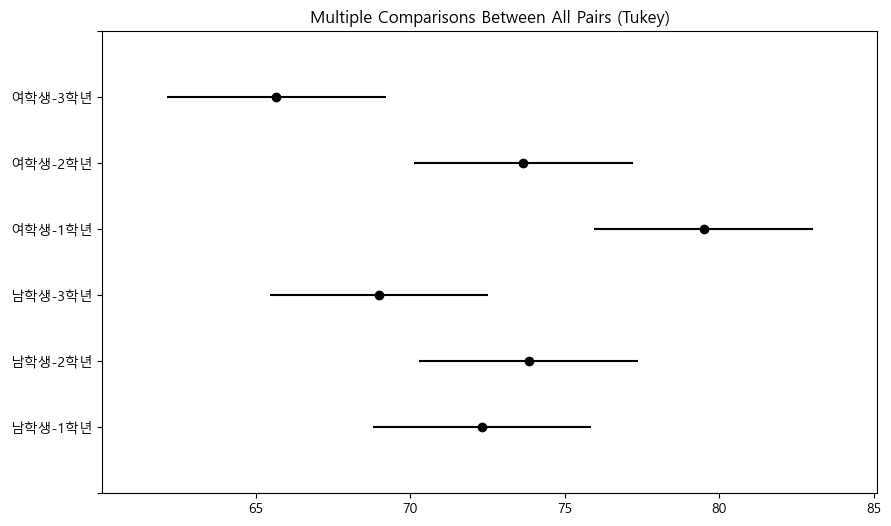

In [93]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(data = df.점수, groups = df.성별학년)
tukeyhsd = mc.tukeyhsd(alpha = 0.05)
display(tukeyhsd.summary())
tukeyhsd.plot_simultaneous()
plt.show()

```
사후분석이란 분산분석의 결과 귀무가설이 기각되어 적어도 한 집단에서 평균의 차이가 있음이 
통계적으로 증명되었을 경우,어떤 집단들에 대해서 평균의 차이가 존재하는지를 알아보기 위해 실시하는 분석이다.
본 분석에서는 사후분석의 한 종류인 Tukey의 HSD 방법을 적용한다.

남학생-1학년	여학생-1학년
남학생-2학년	여학생-3학년
남학생-3학년	여학생-1학년
여학생-1학년	여학생-3학년
여학생-2학년	여학생-3학년
간 성적평균에 차이가 있는 것으로 나타난다.
```


## 통계2
일자별 장마감시간의 주식의 상승과 하락을 추적한 데이터이다.
주가 변동이 무작위 인지 특정 경향성을 가지는지 통계적으로 확인하려 한다.

(1) 가설설정
(2) 검정 통계량 확인 및 분석

In [137]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/mock/003_s2.csv')
df.head(3)

,Unnamed: 0,Price Change
0,2024-01-01,상승
1,2024-01-02,하락
2,2024-01-03,상승


In [138]:
from statsmodels.sandbox.stats.runs import runstest_1samp
H0 = '주가 변동이 무작위'
H1 = '주가 변동이 특정경향성을 가진다'

df['Price Change'] = df['Price Change'].map({'상승':1,'하락':0})

# 런검정 수행
statistic, p_value = runstest_1samp(df['Price Change'], 0.5)
alpha = 0.05
print(f"Test Statistic: {statistic:.4f}")
print(f"p-value: {p_value}")
if p_value<alpha:    print(H1)
else:print(H0)

Test Statistic: 1.6717
p-value: 0.09457714696436235
주가 변동이 무작위


## 통계3
연구자가 새로운 수면 개선 약을 개발했으며, 이 약의 효과를 검증하기 위해 10명의 피험자에게 일주일 동안 매일 밤 약을 복용하도록 하고, 복용 전과 복용 후의 평균 수면 시간을 비교했다. 연구자는 약이 수면 시간에 유의미한 변화를 가져다주었는지 확인하고 싶어 한다.
(1) 가설 설정
(2) 통계 검정

피험자	복용 전 평균 수면 시간(시간)	복용 후 평균 수면 시간(시간)
1	6	7
2	7	8
3	6.5	6.8
4	5	6.5
5	7	7.5
6	5.5	5
7	6.7	7
8	6.2	6.8
9	7	7.2
10	5.5	6

약 복용 전/후 관계의 비교이므로 대응표본 비교검정을 진행한다. 10명의 샘플로 소수이기에, t검정 진행

In [135]:
import pandas as pd
from scipy.stats import ttest_rel
H0= '약의 효과가 없다'
H1= '약의 효과가 있다'
df = pd.DataFrame({'a':[6, 7, 6.5, 5, 7, 5.5, 6.7, 6.2, 7,5.5],
'b':[7,8,6.8,6.5,7.5,5,7,6.8,7.2,6]})

d= df['a']-df['b']
_,p1 =kstest(d, 'norm', args = (d.mean(), d.std()), alternative = 'two-sided')

alpha = 0.05
if p1>alpha: print(f'Kolmogorov-Smirnov : {p1}로 0.05이상이므로 정규성을 만족한다. 대응표본t검정진행 ')
else: print(f'Kolmogorov-Smirnov : {p1}로 0.05이하로 정규성을 불만족한다. Wilcoxon검정진행')

t_stats, p_val = ttest_rel(df['a'],df['b'])

print('검정통계량 :',t_stats)
print('p_value:',p_val)

alpha=0.05
if p_val<alpha: print(H1)
else: print(H2)

Kolmogorov-Smirnov : 0.9051240953458093로 0.05이상이므로 정규성을 만족한다. 대응표본t검정진행 
검정통계량 : -3.13868624608312
p_value: 0.011953286996060896
약의 효과가 있다


## 통계4
학생 20명을 무작위로 두 그룹으로 나누어 카페인이 학습에 효과가 있는지 확인하려한다. 두 그룹간의 평균 점수 차이가 존재하는지 확인하라
카페인 그룹 테스트 점수: [88, 92, 94, 95, 96, 97, 91, 93, 98, 94]
플라시보 그룹 테스트 점수: [81, 83, 84, 88, 86, 85, 87, 82, 80, 83]

(1) 가설설정
(2) 검정

두 그룹간의 평균 점수 차이가 존재하는지 확인하는 문제로 독립표본 t검정을 진행

In [130]:
from scipy.stats import kstest
from scipy.stats import ttest_ind
H0= '카페인이 학습에 효과가 없다'
H1= '카페인이 학습에 효과가 있다'
df= pd.DataFrame({'카페인':[88, 92, 94, 95, 96, 97, 91, 93, 98, 94], 
'플라시보':[81, 83, 84, 88, 86, 85, 87, 82, 80, 83]})

d= df['카페인']-df['플라시보']
_,p1 =kstest(d, 'norm', args = (d.mean(), d.std()), alternative = 'two-sided')
# _,p2 =shapiro(d)
alpha = 0.05
if p1>alpha: print(f'Kolmogorov-Smirnov : {p1}로 0.05이상이므로 정규성을 만족한다. 독립표본t검정진행 ')
else: print(f'Kolmogorov-Smirnov : {p1}로 0.05이하로 정규성을 불만족한다. Wilcoxon검정진행')

stats, p_val = ttest_ind(df['카페인'], df['플라시보'])
print(f'p_value : {p_val}')
if p_val<alpha:print(H1)
else:print(H0)

Kolmogorov-Smirnov : 0.8167806497680714로 0.05이상이므로 정규성을 만족한다. 독립표본t검정진행 
p_value : 2.8092354338358786e-07
카페인이 학습에 효과가 있다


### 참고.

In [109]:
from scipy.stats import t
import numpy as np
H0= '카페인이 학습에 효과가 없다'
H1= '카페인이 학습에 효과가 있다'

df= pd.DataFrame({'카페인':[88, 92, 94, 95, 96, 97, 91, 93, 98, 94], 
'플라시보':[81, 83, 84, 88, 86, 85, 87, 82, 80, 83]})

x, y, s1, s2, n1, n2 = df['카페인'].mean(), df['플라시보'].mean(), df['카페인'].std(ddof=1), df['플라시보'].std(ddof=1),len(df['카페인']),len(df['플라시보'])

pv = (s1**2*(n1-1)+s2**2*(n2-1))/(n1+n2) #합동분산 (pooled variance)
se = np.sqrt(pv) * np.sqrt(1/n1+1/n2) # standard error
alpha = 0.05
t_stats = (x-y)/se
p_val = 1- t.cdf(t_stats,n1+n2-2)

print(f'p_value : {p_val}')
if p_val<alpha:print(H1)
else:print(H0)
# t_alpha = t.ppf(1-alpha/2, n1+n2-2)
# print('검정통계량 :',t_stats)
# print('임계값:',t_alpha)

# if t_stats<t_alpha: print(H0)
# else: print(H1)

p_value : 6.599532675899411e-08
카페인이 학습에 효과가 있다


In [132]:
'''
만약, 정규성을 만족하지 못하는 데이터로 가정하면 아래와 같이 풀면 된다.
Wilcoxon 순위합 검정(Wilcoxon Rank Sum Test)은 두 독립 집단의 중앙값 차이를 검정하는 비모수 검정 방법.
파이썬에서 scipy.stats 모듈의 wilcoxon 함수를 사용하여 수행할 수 있습니다.
'''
import numpy as np
from scipy.stats import wilcoxon
H0= '카페인이 학습에 효과가 없다'
H1= '카페인이 학습에 효과가 있다'
# Wilcoxon 순위합 검정 수행
statistic, p_val = wilcoxon(df['카페인'], df['플라시보'])

print(f"Test Statistic: {statistic:.4f}")
print(f"p-value: {p_value:.4f}")
alpha=0.05
if p_val<alpha:print(H1)
else:print(H0)

Test Statistic: 0.0000
p-value: 0.6847
카페인이 학습에 효과가 있다


In [133]:
'''
Mann-Whitney U 검정은 두 독립 집단의 중앙값 차이를 검정하는 비모수 검정 방법
파이썬에서 scipy.stats 모듈의 mannwhitneyu 함수를 사용하여 수행할 수 있습니다.
예를 들어, 두 가지 다른 약물 처리(A, B)의 효과를 비교하고자 한다고 가정해 봅시다.
'''
import numpy as np
from scipy.stats import mannwhitneyu

# Mann-Whitney U 검정 수행
statistic, p_val = mannwhitneyu(df['카페인'], df['플라시보'])

print(f"Test Statistic: {statistic:.4f}")
print(f"p-value: {p_value:.4f}")
alpha=0.05
if p_val<alpha:print(H1)
else:print(H0)

Test Statistic: 99.5000
p-value: 0.6847
카페인이 학습에 효과가 있다


In [125]:
'''
Kruskal-Wallis 검정은 세 개 이상의 독립 집단의 중앙값 차이를 검정하는 비모수 검정 방법
파이썬에서 scipy.stats 모듈의 kruskal 함수를 사용하여 수행
예를 들어, 세 가지 다른 약물 처리(A, B, C)의 효과를 비교하고자 한다고 가정시
'''
import numpy as np
from scipy.stats import kruskal

H0 = '세 집단의 중앙값 차이가 없다'
H1 = '세 집단의 약물처리 효과의 차이가 있다'

# 예시 데이터
treatment_a = [5, 7, 8, 6, 9]
treatment_b = [6, 8, 7, 9, 5, 7]
treatment_c = [4, 6, 8, 7, 9, 10]

# Kruskal-Wallis 검정 수행
statistic, p_val = kruskal(treatment_a, treatment_b, treatment_c)
alpha=0.05

print(f"Test Statistic: {statistic:.4f}")
print(f"p-value: {p_value:.4f}")
if p_val<alpha : print(H1)
else : print(H0)

Test Statistic: 0.2105
p-value: 0.9001
세 집단의 중앙값 차이가 없다
